In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

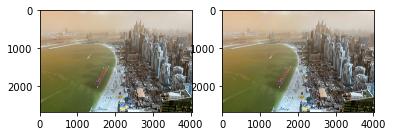

In [2]:
img = cv.imread('color-2.jpg')
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

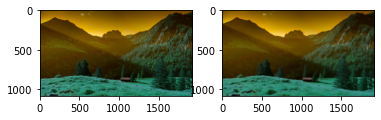

In [3]:
img = cv.imread('gray-2.jpg')
dst = cv.fastNlMeansDenoising(img,None,30,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [4]:
def applynoise(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(image)
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

In [5]:
cap = cv.VideoCapture(0)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))   
size = (frame_width, frame_height)
result = cv.VideoWriter('video.avi', cv.VideoWriter_fourcc(*'MJPG'), 10, size)
c = 0
if not cap.isOpened():
    print("Cannot open camera")
    exit()
import time
while True:
    time.sleep(1)
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = applynoise(frame)
    result.write(frame)
    cv.imshow('frame',frame)
    if cv.waitKey(1) == ord('q') or c==5:
        break
    c += 1
cap.release()
result.release()
cv.destroyAllWindows()

<ipython-input-4-16e3ef337f91>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-4-16e3ef337f91>:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


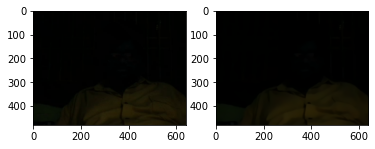

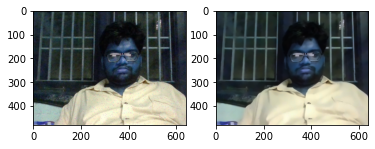

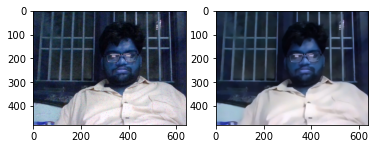

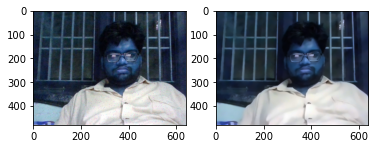

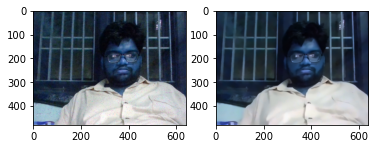

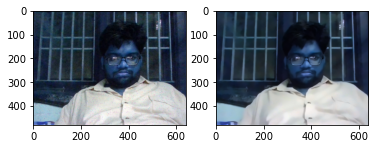

Can't recieve the frame from video stopping the process....


In [6]:
cap = cv.VideoCapture('video.avi')
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret,frame = cap.read()
    if not ret:
        print("Can't recieve the frame from video stopping the process....")
        break
    dst = cv.fastNlMeansDenoisingColored(frame,None,10,10,7,21)
    plt.subplot(121),plt.imshow(frame)
    plt.subplot(122),plt.imshow(dst)
    plt.show()

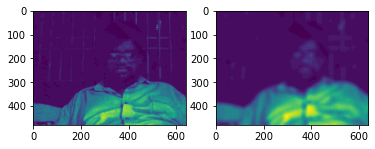

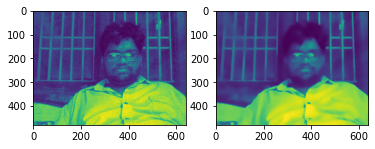

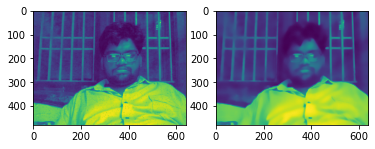

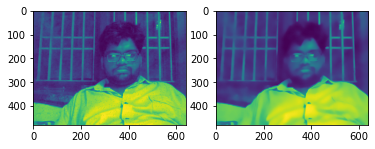

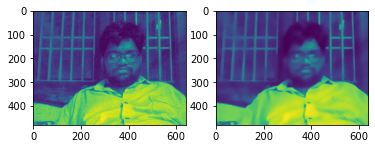

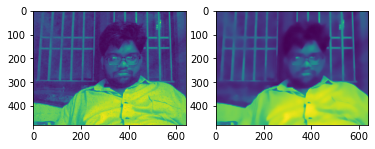

Can't recieve the frame from video stopping the process....


In [7]:
cap = cv.VideoCapture('video.avi')
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret,frame = cap.read()
    if not ret:
        print("Can't recieve the frame from video stopping the process....")
        break
    frame = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    dst = cv.fastNlMeansDenoising(frame,None,30,7,21)
    plt.subplot(121),plt.imshow(frame)
    plt.subplot(122),plt.imshow(dst)
    plt.show()